https://www.pyquantnews.com/the-pyquant-newsletter/build-an-implied-volatility-surface-with-python

https://www.investopedia.com/articles/stock-analysis/081916/volatility-surface-explained.asp

Put and call options usually have different volatility surfaces.

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings 



In [2]:
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

%matplotlib ipympl

In [3]:
#Parameters

Stock="AAPL"
Lookback_period=5                   #Only consider options traded in the past x days
Minimum_impliedVolatility=0.005     #Only consider options above this implied volatility

Get a list of available expiration dates for options contracts using Ticker.options.

Initialize an empty DataFrame called option_data to store all the option chain data. Loop through each expiration date:

Fetch the option chain data for the current expiration date using Ticker.option_chain(expiration). Separate the call and put options data.
https://www.investopedia.com/terms/o/optionchain.asp

Add an "Option Type" column to identify whether it's a call or put option.

Calculate the actual expiration date by adding 23 hours, 59 minutes, and 59 seconds to the expiration date (to account for market closing times).

Concatenate the options data for this expiration date with the option_data DataFrame. Calculate the "Days to Expiration" by finding the difference between the expiration date and the current date and time. This information is added as a new column to the option_data DataFrame.

Return the option_data DataFrame containing all the fetched options data.


In [4]:
def fetch_option_data(ticker): 
    """
    Fetch option chain data for a given stock ticker. 
    """
    Ticker = yf.Ticker(ticker)
    expirations = Ticker.options
    
    option_data = pd.DataFrame() 
    
    for expiration in expirations:
        
        option_chain = Ticker.option_chain(expiration) 
        
        calls = option_chain.calls
        calls['Option Type'] = "Call" 
        
        puts = option_chain.puts
        puts['Option Type'] = "Put" 
        
        options = pd.concat([calls, puts])
        options['Expiration Date'] = pd.to_datetime(expiration) + pd.DateOffset(hours=23, minutes=59, seconds=59)
        
        option_data = pd.concat([option_data, options])
    option_data["Days to Expiration"] = (option_data['Expiration Date'] - dt.datetime.today()).dt.days + 1 
    
    return option_data

QQQ: Nasdaq

SPY: SP500

In [5]:
# Fetch option data for stock specified in parameters above
options_data = fetch_option_data(Stock)

In [6]:
options_data

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Option Type,Expiration Date,Days to Expiration
0,AAPL240823C00100000,2024-08-08 18:03:44+00:00,100.0,113.75,125.20,127.15,0.0,0.0,1.0,2,2.621097,True,REGULAR,USD,Call,2024-08-23 23:59:59,6
1,AAPL240823C00105000,2024-07-31 17:32:00+00:00,105.0,117.09,120.15,122.25,0.0,0.0,1.0,1,2.531254,True,REGULAR,USD,Call,2024-08-23 23:59:59,6
2,AAPL240823C00110000,2024-08-01 15:40:38+00:00,110.0,110.15,115.20,117.15,0.0,0.0,NaN,1,2.335942,True,REGULAR,USD,Call,2024-08-23 23:59:59,6
3,AAPL240823C00115000,2024-08-09 14:06:21+00:00,115.0,98.47,110.15,112.05,0.0,0.0,NaN,6,1.984375,True,REGULAR,USD,Call,2024-08-23 23:59:59,6
4,AAPL240823C00120000,2024-07-16 16:17:00+00:00,120.0,113.70,103.80,106.20,0.0,0.0,30.0,30,2.121098,True,REGULAR,USD,Call,2024-08-23 23:59:59,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,AAPL261218P00310000,2024-07-12 15:19:38+00:00,310.0,79.29,92.00,95.95,0.0,0.0,10.0,0,0.255119,True,REGULAR,USD,Put,2026-12-18 23:59:59,853
45,AAPL261218P00320000,2024-08-06 14:19:33+00:00,320.0,114.72,92.25,95.70,0.0,0.0,NaN,0,0.151620,True,REGULAR,USD,Put,2026-12-18 23:59:59,853
46,AAPL261218P00330000,2024-07-26 14:51:20+00:00,330.0,112.88,102.25,105.70,0.0,0.0,1.0,1,0.161477,True,REGULAR,USD,Put,2026-12-18 23:59:59,853
47,AAPL261218P00340000,2024-08-06 16:45:16+00:00,340.0,131.09,112.25,116.00,0.0,0.0,1.0,2,0.176705,True,REGULAR,USD,Put,2026-12-18 23:59:59,853


In [7]:
options_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1778 entries, 0 to 48
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   contractSymbol      1778 non-null   object             
 1   lastTradeDate       1778 non-null   datetime64[ns, UTC]
 2   strike              1778 non-null   float64            
 3   lastPrice           1778 non-null   float64            
 4   bid                 1778 non-null   float64            
 5   ask                 1778 non-null   float64            
 6   change              1778 non-null   float64            
 7   percentChange       1778 non-null   float64            
 8   volume              1688 non-null   float64            
 9   openInterest        1778 non-null   int64              
 10  impliedVolatility   1778 non-null   float64            
 11  inTheMoney          1778 non-null   bool               
 12  contractSize        1778 non-null   objec

In [8]:
#We need a filter for last trade date, say no more than 5 days
options_data["lastTradeDate"] = pd.to_datetime(options_data["lastTradeDate"]).dt.tz_localize(None)
options_data = options_data[options_data["lastTradeDate"] >= (dt.datetime.today() - dt.timedelta(days=Lookback_period))]

In [9]:
#We need a filter for open interest, say more than 0
options_data = options_data[options_data["openInterest"] > 0]

In [10]:
options_data

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Option Type,Expiration Date,Days to Expiration
10,AAPL240823C00160000,2024-08-16 18:11:57,160.0,65.90,65.25,67.20,0.810005,1.244439,25.0,26,1.257816,True,REGULAR,USD,Call,2024-08-23 23:59:59,6
11,AAPL240823C00165000,2024-08-13 18:37:02,165.0,56.73,60.20,62.10,0.000000,0.000000,10.0,43,1.072270,True,REGULAR,USD,Call,2024-08-23 23:59:59,6
12,AAPL240823C00170000,2024-08-16 17:12:12,170.0,56.70,55.25,57.20,4.600002,8.829180,5.0,83,1.060552,True,REGULAR,USD,Call,2024-08-23 23:59:59,6
13,AAPL240823C00175000,2024-08-16 18:13:39,175.0,50.95,50.20,52.15,0.670002,1.332542,22.0,112,0.919923,True,REGULAR,USD,Call,2024-08-23 23:59:59,6
14,AAPL240823C00180000,2024-08-16 18:15:15,180.0,46.00,45.95,46.60,3.849998,9.134041,91.0,164,0.908204,True,REGULAR,USD,Call,2024-08-23 23:59:59,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,AAPL261218P00250000,2024-08-16 19:23:43,250.0,37.54,37.10,38.95,-1.110001,-2.871929,7.0,502,0.174447,True,REGULAR,USD,Put,2026-12-18 23:59:59,853
39,AAPL261218P00260000,2024-08-16 19:23:43,260.0,43.48,41.80,45.30,-3.090000,-6.635173,2.0,1193,0.167748,True,REGULAR,USD,Put,2026-12-18 23:59:59,853
40,AAPL261218P00270000,2024-08-14 16:45:02,270.0,54.63,48.50,51.30,0.000000,0.000000,4.0,138,0.152779,True,REGULAR,USD,Put,2026-12-18 23:59:59,853
41,AAPL261218P00280000,2024-08-13 17:40:54,280.0,61.10,55.85,59.10,0.000000,0.000000,3.0,82,0.147759,True,REGULAR,USD,Put,2026-12-18 23:59:59,853


In [11]:
# Select call options
call_options = options_data[options_data["Option Type"] == "Call"]

In [12]:
#Sort by Expiration Dates
call_options.sort_values(by=['Expiration Date'], ascending=True, inplace=True)

In [13]:
#call_options

In [14]:
# Print available expiration dates
#print("Available Expiration Dates:")
#print(set(call_options['Expiration Date']))

In [15]:
#Perhaps create a list of all the unique Available Expiration Dates for better referencing
Available_Expiration_Dates=call_options['Expiration Date'].unique().tolist()
Available_Expiration_Dates

[Timestamp('2024-08-23 23:59:59'),
 Timestamp('2024-08-30 23:59:59'),
 Timestamp('2024-09-06 23:59:59'),
 Timestamp('2024-09-13 23:59:59'),
 Timestamp('2024-09-20 23:59:59'),
 Timestamp('2024-09-27 23:59:59'),
 Timestamp('2024-10-18 23:59:59'),
 Timestamp('2024-11-15 23:59:59'),
 Timestamp('2024-12-20 23:59:59'),
 Timestamp('2025-01-17 23:59:59'),
 Timestamp('2025-03-21 23:59:59'),
 Timestamp('2025-06-20 23:59:59'),
 Timestamp('2025-08-15 23:59:59'),
 Timestamp('2025-09-19 23:59:59'),
 Timestamp('2025-12-19 23:59:59'),
 Timestamp('2026-01-16 23:59:59'),
 Timestamp('2026-06-18 23:59:59'),
 Timestamp('2026-12-18 23:59:59')]

In [16]:
len(Available_Expiration_Dates)

18

### Volatility Smile

In [17]:
# Select an expiration date to plot
#chosen_expiry_date = "2024-08-20 23:59:59"
chosen_expiry_date = Available_Expiration_Dates[5]
selected_calls_at_expiry = call_options[call_options["Expiration Date"] == chosen_expiry_date]

In [18]:
# Filter out low implied volatility options
filtered_calls_at_expiry = selected_calls_at_expiry[selected_calls_at_expiry["impliedVolatility"] >= Minimum_impliedVolatility]

In [19]:
#Sort by Strike
filtered_calls_at_expiry.sort_values(by=['strike'], ascending=True, inplace=True)

In [20]:
# Set the strike price as the index for better plotting
filtered_calls_at_expiry.set_index("strike", inplace=True)

In [21]:
#filtered_calls_at_expiry

#### Using matplotlib

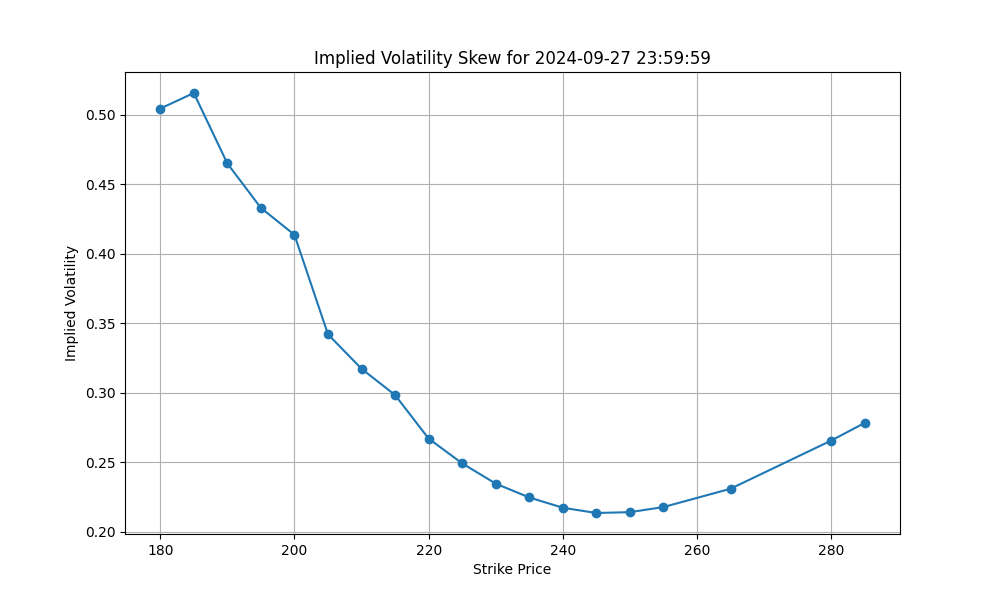

In [22]:
# Plot Implied Volatility Skew
plt.figure(figsize=(10, 6))
plt.plot(filtered_calls_at_expiry.index, filtered_calls_at_expiry["impliedVolatility"], marker='o', linestyle='solid') 
plt.title(f"Implied Volatility Skew for {chosen_expiry_date}")
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.grid(True)

#### Using Plotly

In [23]:
fig = px.line(x=filtered_calls_at_expiry.index ,y =filtered_calls_at_expiry["impliedVolatility"],
              title=f"Implied Volatility Skew for {chosen_expiry_date}", 
              labels={'x':'Strike Price', 'y':'Implied Volatility'},
              width=800, height=600,
              markers=True)
fig.show()

### Volatility Term Structure

In [37]:
#Perhaps create a list of all the unique strike price for better referencing
Available_Strike_Prices=call_options['strike'].unique().tolist()
#Available_Strike_Prices

In [40]:
# Select a specific strike price to plot
#selected_strike_price = 19000
selected_strike_price = Available_Strike_Prices[7]
selected_calls_at_strike = call_options[call_options["strike"] == selected_strike_price]

In [41]:
selected_calls_at_strike 

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Option Type,Expiration Date,Days to Expiration
39,AAPL240823C00245000,2024-08-16 19:35:30,245.0,0.02,0.01,0.02,0.000000,0.000000,191.0,1227,0.257820,False,REGULAR,USD,Call,2024-08-23 23:59:59,6
33,AAPL240830C00245000,2024-08-16 19:49:25,245.0,0.08,0.08,0.09,-0.010000,-11.111116,1193.0,2257,0.216805,False,REGULAR,USD,Call,2024-08-30 23:59:59,13
25,AAPL240906C00245000,2024-08-16 19:39:15,245.0,0.19,0.17,0.20,0.010000,5.555550,553.0,750,0.201668,False,REGULAR,USD,Call,2024-09-06 23:59:59,20
23,AAPL240913C00245000,2024-08-16 19:59:29,245.0,0.44,0.43,0.47,0.090000,25.714287,230.0,5376,0.208748,False,REGULAR,USD,Call,2024-09-13 23:59:59,27
48,AAPL240920C00245000,2024-08-16 19:59:09,245.0,0.76,0.75,0.78,0.090000,13.432832,3091.0,21403,0.212044,False,REGULAR,USD,Call,2024-09-20 23:59:59,34
17,AAPL240927C00245000,2024-08-16 19:51:03,245.0,1.05,1.03,1.10,0.140000,15.384607,144.0,444,0.213509,False,REGULAR,USD,Call,2024-09-27 23:59:59,41
38,AAPL241018C00245000,2024-08-16 19:58:26,245.0,2.10,2.14,2.19,0.140000,7.142850,547.0,7678,0.219979,False,REGULAR,USD,Call,2024-10-18 23:59:59,62
39,AAPL241115C00245000,2024-08-16 19:42:09,245.0,4.34,4.30,4.40,0.340000,8.500004,1063.0,39320,0.246101,False,REGULAR,USD,Call,2024-11-15 23:59:59,90
40,AAPL241220C00245000,2024-08-16 19:47:34,245.0,5.80,5.85,5.95,0.450000,8.411221,128.0,5668,0.242866,False,REGULAR,USD,Call,2024-12-20 23:59:59,125
48,AAPL250117C00245000,2024-08-16 19:47:34,245.0,7.05,7.10,7.25,0.450000,6.818186,365.0,14905,0.244270,False,REGULAR,USD,Call,2025-01-17 23:59:59,153


In [42]:
# Filter out low implied volatility options
filtered_calls_at_strike = selected_calls_at_strike[selected_calls_at_strike["impliedVolatility"] >= Minimum_impliedVolatility]

In [43]:
# Set the expiration date as the index for better plotting
filtered_calls_at_strike.set_index("Expiration Date", inplace=True)

In [44]:
#filtered_calls_at_strike

#### Using matplotlib

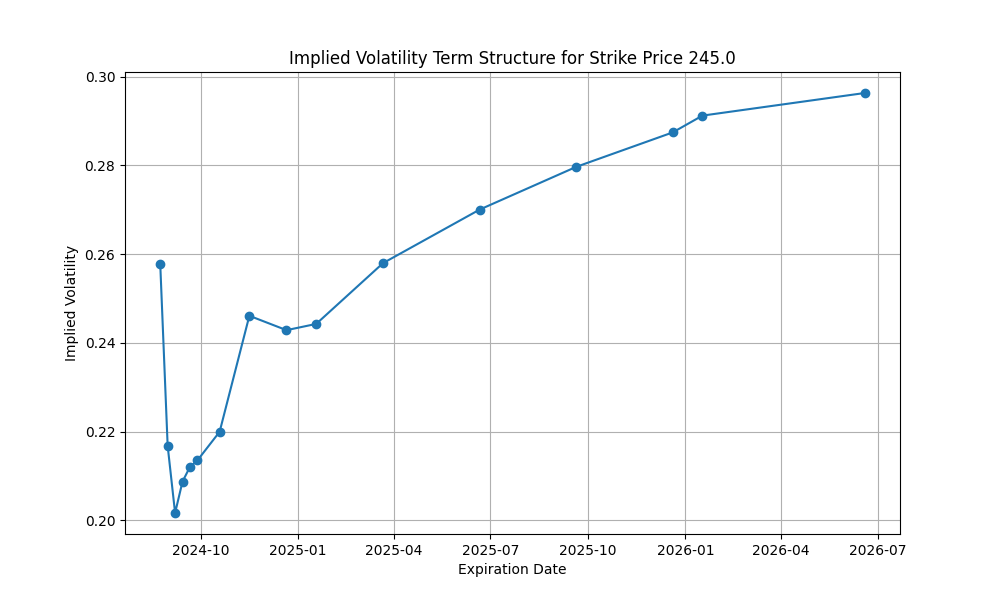

In [45]:
# Plot Implied Volatility Term Structure
plt.figure(figsize=(10, 6))
plt.plot(filtered_calls_at_strike.index, filtered_calls_at_strike["impliedVolatility"], marker='o', linestyle='solid')
plt.title(f"Implied Volatility Term Structure for Strike Price {selected_strike_price}")
plt.xlabel("Expiration Date")
plt.ylabel("Implied Volatility")
plt.grid(True)

#### Using Plotly

In [46]:
fig = px.line(x=filtered_calls_at_strike.index ,y =filtered_calls_at_strike["impliedVolatility"],
              title=f"Implied Volatility Term Structure for Strike Price {selected_strike_price}", 
              labels={'x':'Expiration Date', 'y':'Implied Volatility'},
              width=800, height=600,
              markers=True)
fig.show()

### Volatility Surface

In [47]:
#call_options

In [48]:
# pivot the dataframe
surface = (call_options[["Days to Expiration", 'strike', 'impliedVolatility']]
           .pivot_table(values='impliedVolatility', index='strike', columns="Days to Expiration")
           .dropna()
)

In [49]:
surface

Days to Expiration,6,13,20,27,34,41,62,90,125,153,216,307,363,398,489,517,670,853
strike,,,,,,,,,,,,,,,,,,
180.0,0.908204,0.704593,0.665287,0.618656,0.530156,0.504399,0.482061,0.451788,0.417608,0.407843,0.390692,0.381262,0.383673,0.377203,0.376013,0.374854,0.371588,0.372199
185.0,0.814455,0.646488,0.615238,0.549565,0.520268,0.515630,0.452703,0.419317,0.395697,0.387274,0.375739,0.369116,0.369513,0.370764,0.365607,0.367316,0.363440,0.364936
190.0,0.721682,0.563969,0.517095,0.500493,0.471685,0.464971,0.424200,0.393866,0.375495,0.369452,0.361609,0.357581,0.364447,0.357917,0.360450,0.359580,0.355750,0.360724
200.0,0.559575,0.531987,0.478033,0.452520,0.393561,0.413641,0.354987,0.352057,0.340094,0.337836,0.335425,0.336951,0.342627,0.338202,0.344977,0.348212,0.344764,0.344474
210.0,0.417242,0.360114,0.335212,0.320075,0.313850,0.317268,0.307502,0.316413,0.311835,0.309730,0.313972,0.318549,0.328376,0.320472,0.332938,0.328300,0.331122,0.329078
220.0,0.281257,0.264045,0.253670,0.265632,0.264168,0.267036,0.269569,0.291023,0.287025,0.284980,0.294654,0.302436,0.314155,0.312598,0.319083,0.314170,0.319648,0.326026
230.0,0.208504,0.211922,0.209420,0.226570,0.231697,0.234627,0.242500,0.267402,0.265754,0.266761,0.277839,0.287483,0.295036,0.297218,0.309592,0.310493,0.310401,0.315299
240.0,0.227547,0.201668,0.194832,0.209358,0.214974,0.217293,0.225716,0.251839,0.249275,0.250465,0.264168,0.275383,0.282264,0.284462,0.292076,0.297096,0.300254,0.305747
250.0,0.316413,0.240242,0.214852,0.214852,0.213631,0.214119,0.216744,0.241768,0.236946,0.238991,0.252418,0.265754,0.272590,0.276634,0.284065,0.285194,0.292823,0.300849


#### Using matplotlib

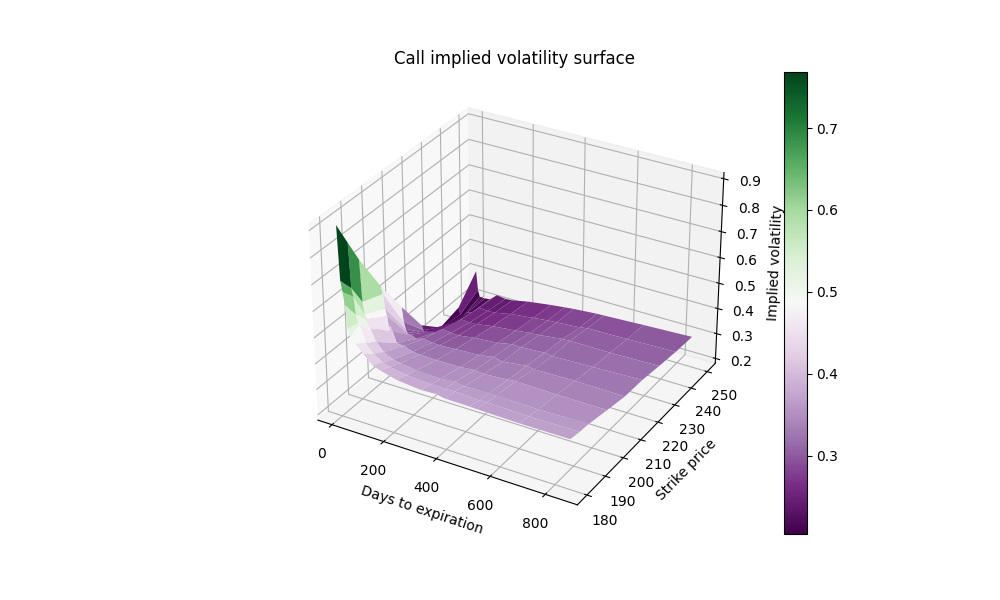

In [50]:
# create the figure object
fig = plt.figure(figsize=(10, 6))

# add the subplot with projection argument
ax = fig.add_subplot(111, projection='3d')

# get the 1d values from the pivoted dataframe
x, y, z = surface.columns.values, surface.index.values, surface.values

# return coordinate matrices from coordinate vectors
X, Y = np.meshgrid(x, y)

# set labels
ax.set_xlabel('Days to expiration')
ax.set_ylabel('Strike price')
ax.set_zlabel('Implied volatility')
ax.set_title('Call implied volatility surface')

# plot
plot=ax.plot_surface(X, Y, z, cmap='PRGn')

# Colorbar
fig.colorbar(plot, ax=ax);

#### Using Plotly

In [36]:
fig = go.Figure(data=[go.Surface(z=surface.values,x=surface.index,y=surface.columns)])

fig.update_layout(title='Call implied volatility surface', 
                  scene=dict(
                        xaxis_title='Strike',
                        yaxis_title='Days to Expiration',
                        zaxis_title='Implied Vol'
                    ),
                  autosize=True,
                  width=800, height=600,
                  margin=dict(l=10, r=10, b=30, t=30)
)

fig.show()